##**マルコフ連鎖モンテカルロ法 (Markov Chain Monte Carlo, MCMC)**

MCMC（マルコフ連鎖モンテカルロ法）は、マルコフ連鎖を利用した確率分布から、ターゲットとする静的な分布を持つサンプルを抽出するアルゴリズムの一種です。このポストでは、MCMCの数学的な詳細よりも、MCMCの意味を理解することに焦点を当てて説明します。




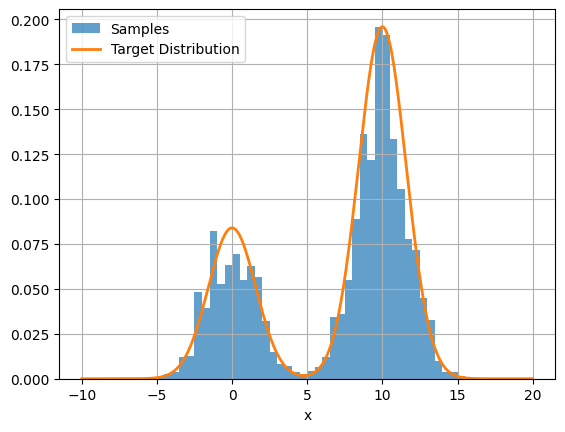

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 設定
np.random.seed(1)
n_iter = 5000

# ターゲット関数の定義
def target(x):
    return 0.3 * np.exp(-0.2 * x**2) + 0.7 * np.exp(-0.2 * (x - 10)**2)

# 提案分布の定義（正規分布）
def proposal(x, mu, s):
    return 1 / (s * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * s**2))

# 初期化
x = [(np.random.rand() - 0.5) * 30 + 5]  # -10から20の間のランダムな値を設定

# 標準偏差の設定
my_std = 10

# Metropolis-Hastingsアルゴリズムの実行
for i in range(n_iter):
    u = np.random.rand()  # uのサンプリング
    x_old = x[-1]  # 現在のサンプル

    # 提案された新しいサンプルを生成
    x_new = np.random.randn() * my_std + x_old

    # A(x_old, x_new)の計算
    A = min(1,
            (target(x_new) * proposal(x_old, x_new, my_std)) /
            (target(x_old) * proposal(x_new, x_old, my_std)))

    # 提案されたサンプルを受け入れるかどうかを決定
    if u < A:
        x.append(x_new)
    else:
        x.append(x_old)

# 結果のプロット
xx = np.linspace(-10, 20, 1000)
plt.hist(x, bins=np.arange(-10, 20, 0.5), density=True, alpha=0.7, label='Samples')
plt.plot(xx, target(xx) / max(target(xx)) * max(np.histogram(x, bins=np.arange(-10, 20, 0.5), density=True)[0]), linewidth=2, label='Target Distribution')
plt.grid(True)
plt.xlabel('x')
plt.legend()
plt.show()


###Monte Carlo
Monte Carlo法とは、統計的な数値を得るためにシミュレーションを行う方法です。無限に多くの試行を行うのは現実的に困難なため、有限の試行で真の答えを推定することを目的としています。
有名な例として、円の面積を近似的に計算するMonte Carloシミュレーションがあります。図のように、正方形の中に無数の点を打ち、円の内部かどうかを判断することで円の面積を推定します。


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


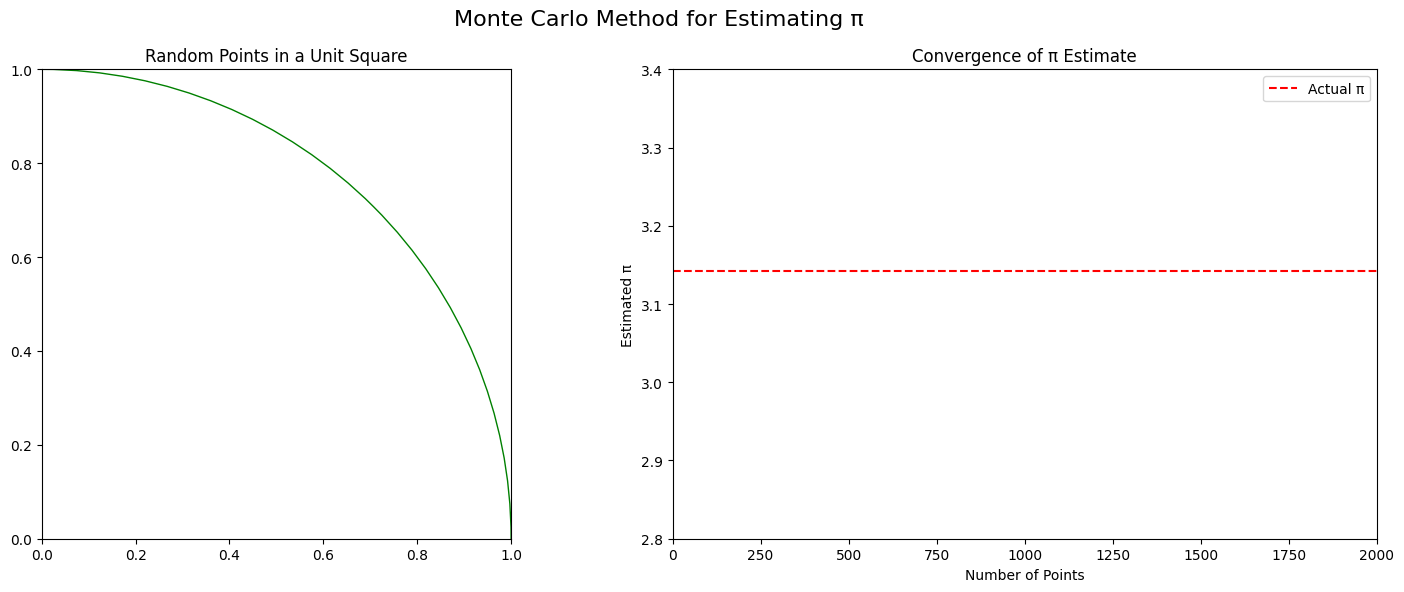

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

from google.colab import drive
drive.mount('/content/drive')

# Set up the figure and axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Monte Carlo Method for Estimating π', fontsize=16)

# Initialize variables
total_points = 2000
points_inside_circle = 0
x_inside = []
y_inside = []
x_outside = []
y_outside = []
pi_estimates = []

# Set up the scatter plots
scatter_inside = ax1.scatter([], [], c='blue', alpha=0.6, s=1)
scatter_outside = ax1.scatter([], [], c='red', alpha=0.6, s=1)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.set_aspect('equal', adjustable='box')
ax1.add_artist(plt.Circle((0, 0), 1, fill=False, color='green'))
ax1.set_title('Random Points in a Unit Square')

# Set up the line plot for pi estimation
line, = ax2.plot([], [], lw=2)
ax2.axhline(y=np.pi, color='r', linestyle='--', label='Actual π')
ax2.set_xlim(0, total_points)
ax2.set_ylim(2.8, 3.4)
ax2.set_xlabel('Number of Points')
ax2.set_ylabel('Estimated π')
ax2.set_title('Convergence of π Estimate')
ax2.legend()

# Initialize the animation
def init():
    return scatter_inside, scatter_outside, line

# Update function for the animation
def update(frame):
    global points_inside_circle

    # Generate a new point
    x = np.random.random()
    y = np.random.random()

    # Check if the point is inside the circle
    if x*x + y*y <= 1:
        points_inside_circle += 1
        x_inside.append(x)
        y_inside.append(y)
    else:
        x_outside.append(x)
        y_outside.append(y)

    # Update the scatter plots
    scatter_inside.set_offsets(np.c_[x_inside, y_inside])
    scatter_outside.set_offsets(np.c_[x_outside, y_outside])

    # Calculate the current estimate of pi
    pi_estimate = 4 * points_inside_circle / (frame + 1)
    pi_estimates.append(pi_estimate)

    # Update the line plot
    line.set_data(range(frame + 1), pi_estimates)

    # Update the title with the current estimate
    ax2.set_title(f'Convergence of π Estimate: {pi_estimate:.6f}')

    return scatter_inside, scatter_outside, line

# Create the animation
anim = FuncAnimation(fig, update, frames=total_points, init_func=init, blit=True, interval=1)

plt.tight_layout()
plt.show()

# If you want to save the animation as a gif, uncomment the following line:
anim.save('/content/drive/MyDrive/Colab Notebooks/Statistics/monte_carlo_pi.gif', writer='pillow', fps=30)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

from IPython.display import Image
Image(filename='/content/drive/MyDrive/Colab Notebooks/BあyesStatistics/monte_carlo_pi.gif')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Buffered data was truncated after reaching the output size limit.

###**Markov Chain**
Markov Chainとは、ある状態から次の状態に移る際に、直前の状態のみに影響を受ける確率過程です。日常の例として、「昨日食べた料理は今日は選ばない」という食事の選択プロセスを考えると理解しやすいです。
MCMCでは、「最後に抽出されたサンプルが次のサンプルを推薦する」という性質から、Markov Chainの概念が取り入れられています。


###**MCMCを利用したサンプリング**
MCMCは、Monte Carlo法とMarkov Chainの概念を組み合わせた手法です。最初のサンプルをランダムに選んだ後、そのサンプルを基に次のサンプルを提案し、それを繰り返すことで最終的な分布を推定します。
特に、MCMCサンプリングの代表的なアルゴリズムとしてMetropolisアルゴリズムが使用されます。


###**Metropolisアルゴリズムのサンプリング過程**
1.	ランダムな初期化: サンプリング空間から適当な初期値を選びます。例えば、x0をランダムに設定します。
2.	提案分布から次のポイントを提案: 提案分布から次のサンプルポイントを提案し、提案されたサンプルが受け入れられるか否かを判定します。提案されたサンプルが受け入れられない場合でも、一定の確率で「敗者復活戦」を行い、サンプルとして採用することができます。
提案分布が対称でない場合のMetropolis-Hastingsアルゴリズム
Metropolis-Hastingsアルゴリズムでは、提案分布が非対称の場合にも対応するため、サンプリングの際に提案分布の確率を用いて調整を行います。


###**MCMCを利用したベイズ推定**
MCMCはサンプリングだけでなく、パラメータ推定にも使用できます。例えば、30,000個の要素からなる母集団から1,000個のサンプルを抽出し、その平均値をより正確に推定することができます。
MCMCを用いた推定プロセスでは、まず初期値を設定し、次に提案分布を使用して新しい平均値を提案し、提案が受け入れられるか否かを判断します。推定された平均値を用いて母集団の分布を予測することができます。

###参考資料
•	An introduction to MCMC for Machine Learning / C. Andrieu et al., Machine Learning, 50, 5-43, 2003
•	ソウル大学統計学科キム・ヨンデ教授の講義ノート
•	From Scratch: Bayesian Inference, Markov Chain Monte Carlo and Metropolis Hastings, in Python, Joseph Moukarzel
